In [6]:
import pandas as p
import numpy as np
import matplotlib.pyplot as mp
import scipy.optimize as opt
from scipy.io import loadmat

500


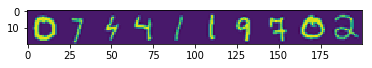

In [105]:
#Data access
data = loadmat('ex3data1.mat')

y = data['y']
x = data['X']
y = np.matrix(y)
x = np.matrix(x)
y_T = y.T.ravel()
x_T = x.T
theta = np.zeros(x.shape[1])
m = x.shape[0]

#Select random images and plot
sample = np.random.choice(x.shape[0],10)
mp.imshow(x[sample, :].reshape(-1,20).T)

In [22]:
#Sigmoid function
sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Gradient function
def gradient(theta,x_T,y_T,m):
    gradient = 1/m * x_T @ (sigmoid_function(theta @ x_T).T - y_T)
    return (np.asarray(gradient).ravel())

#Cost function
def cost_function(theta,x_T,y_T,m):
    cost = -1/m * ((np.log(sigmoid_function(theta @ x_T)) @ y_T) + (np.log(1 - sigmoid_function(theta @ x_T)) @ (1 - y_T)))
    return (np.asarray(cost).ravel()[0])

#Regularized Gradient function
def regularized_gradient(theta,x_T,y_T,m,l):
    theta = np.matrix(theta)
    regularization = (l/m) * theta.T
    regularization[0,0] = 0
    gradient = 1/m * x_T @ (sigmoid_function(theta @ x_T).T - y_T) + regularization
    return (np.asarray(gradient).ravel())

#Regularized Cost function
def regularized_cost_function(theta,x_T,y_T,m,l):
    regularization =  (l/2*m) * (theta @ theta.T)
    cost = (-1/m * ((np.log(sigmoid_function(theta @ x_T)) @ y_T) + (np.log(1 - sigmoid_function(theta @ x_T)) @ (1 - y_T)))) + regularization
    return (np.asarray(cost).ravel()[0])


In [131]:
def oneVsAll(X,y,num_etiquetas,reg):

    labels = (np.ones((np.shape(y)[0],num_etiquetas)) * np.array(y))
    r = range(1,num_etiquetas + 1)
    labels = labels == r
    labels = labels * 1
    labels = np.matrix(labels)
    
    theta_opt = []

    for i in range(0,num_etiquetas - 1):
           theta_opt.append(opt.fmin_tnc(func=regularized_cost_function,x0=theta,fprime=regularized_gradient,args=(x_T,labels[:,i],m,reg))[0])
    
    theta_opt = np.asarray(theta_opt)
    print(theta_opt)
    return theta_opt


In [134]:
#???????????????????????????????????????????????????
theta_opt = oneVsAll(x,y,10,-1)
sigmoid_results = sigmoid_function(theta_opt @ x_T).T >= 0.5
print(np.array(sigmoid_results))
sigmoid_results = np.array(sigmoid_results) * np.arange(10)
print(sigmoid_results)

#comparition_array = sigmoid_results == y

#valid_classes = np.shape(comparition_array[comparition_array == True])[1]
#accuracy = valid_classes / np.shape(comparition_array)[1]
#print(accuracy)
#??????????????????????????????????????????????????

/home/jaime/Documents/pyenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


[[ 0.00000000e+00  0.00000000e+00  1.99452662e-05 ...  7.12603812e-04
   4.29335447e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.82142723e-07 ...  4.11722770e-04
  -5.31709984e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.32497322e-07 ...  6.51571246e-06
  -1.97098169e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.91688928e-07 ... -1.99336406e-04
   2.31129862e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.01610752e-07 ...  1.14464025e-05
  -5.45207699e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.40701156e-06 ... -2.98674195e-05
   2.17848380e-06  0.00000000e+00]]
[[False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True False]]


ValueError: operands could not be broadcast together with shapes (5000,9) (10,) 

In [145]:
#NEURAL NETWORKS

#Data access
data = loadmat('ex3data1.mat')

y = data['y']
x = data['X']
y = np.matrix(y)
x = np.matrix(x)
y_T = y.T.ravel()
x_T = x.T

#Sigmoid function
sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Load all the data and custom weights for the neural network
weights = loadmat('ex3weights.mat')
weights = weights['Theta1'],weights['Theta2']
weights = np.matrix(weights)

x = np.hstack((np.ones((np.shape(x)[0],1)),x))
x_T = x.T

def forward_propagation(activation, weights, i, layers):
    if i == (layers - 2):
        return np.argmax(sigmoid_function(weights[0,i] @ activation)) + 1
    
    if i == -1:
        return forward_propagation(activation,weights,i+1,layers)
    else:
        sigmoid = sigmoid_function(weights[0,i] @ activation)
        activation = np.vstack((1,sigmoid))
        return forward_propagation(activation, weights, i+1, layers)
#for loop?  
results = []

for i in np.arange(5000):
    results.append(forward_propagation(x_T[:,i], weights, -1, 3))  
    
comparition_array = results == y.flatten()

valid_classes = np.shape(comparition_array[comparition_array == True])[1]
accuracy = valid_classes / np.shape(comparition_array)[1]
print(accuracy)

[[ True  True  True ...  True  True  True]]
0.9752
